# M&M Money and Math

A while ago I meet my Father for dinner. We talked about money because I started working on my first job and had some wage questions. A little bit down the road we came upon the subject of inequality.During this talk, he asked me what kind of wealth distribution you would get if 1 million People trade 100 million times. Trading works this way. Select two random People ($_i$ and $_j$).  Add their wealth ($w_i$ and $w_j$) together and multiply it with a random factor $0\le\gamma\le1$. In math turms: 
 
$$ w_i(t+1)=\gamma\times(w_i(t)+w_j(t))$$
$$ w_j(t+1)=(1-\gamma)\times(w_i(t)+w_j(t))$$
 
so for example:
Person $_i$ and $_j$ each have 10 CHF and  $\gamma=0.75$.
 
$$ w_i(t+1)=0.75\times(10\text{ CHF}+10\text{ CHF})=15\text{ CHF}$$
$$ w_j(t+1)=(1-0.75)\times(10\text{ CHF}+10\text{ CHF})=5\text{ CHF}$$
 
Person 1 wins 5 CHF and Person 2 loses 5 CHF.

Not thinking long I answered that it will be normal distributed. Some lose a little, some win a little and most people have the same. 
Something like this:
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg" alt="normdist"
            title="normal distribution" width="500"  />
*Image Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg) License CC BY 2.5*

He told me I was wrong. It will be gamma distributed. That means more people will lose money than keep the same amount and less than half will gain money. I didn't understand but was intrigued. To understand this I started simulating.
 
So let's start with the population of Switzerland (8.5 million) and let them trade for 100 million times.  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

P = 8500000                           # number of People in Switzerland
T = 100000000                         # number of trades

Let's give them all 10 CHF.


In [3]:
people = np.ones(P)*10

Start trading. 

In [5]:
for x in range(T):
    gamma = np.random.rand()
    i = np.random.randint(P)
    j = np.random.randint(P)
    if (i!=j):        
        people[i] = gamma*(people[i]+people[j])
        people[j] = (1-gamma)*(people[i]+people[j])

We can print the results now. 

The richtest Person has now 34.04 CHF and 8410 People won money.
On the other hand the poorest Person has now 0.00 CHF and 8491590 People lost money


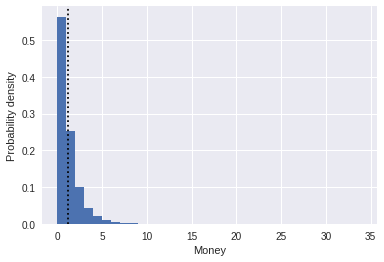

In [6]:
print("The richtest Person has now %.2f CHF and %d People won money." 
      %(np.amax(people), people[people>10].size))
print("On the other hand the poorest Person has now %.2f CHF and %d People lost money"
      %(np.amin(people), people[people<10].size))

plt.hist(people, bins=np.arange(np.amax(people)), density=True)
plt.axvline(people.mean(), color='black', linestyle='dotted')
plt.xlabel('Money')
plt.ylabel('Probability density');

The dotted black line indicates the mean of wealth between all people. So far more people lose money in this scenario.

## So my father was right buy why?

After i had these results I called him and ask for some more details. 

## So what helps?... saving 
$$\epsilon$$

The richtest Person has now 27.71 CHF and 859 People won money.
On the other hand the poorest Person has now 0.01 CHF and 84141 People lost money


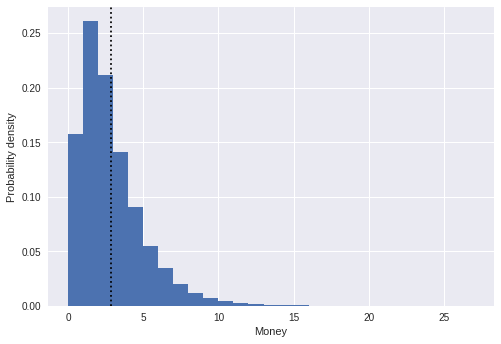

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

P = 85000                           # number of People in Switzerland
T = 1000000                         # number of trades

people = np.ones(P)*10

for x in range(T):
    gamma = np.random.rand()
    epsilon = 0.2
    i = np.random.randint(P)
    j = np.random.randint(P)
    if (i!=j):         
        people[i] = epsilon*people[i]+gamma*((1-epsilon)*(people[i]+people[j]))
        people[j] = epsilon*people[j]+(1-gamma)*((1-epsilon)*(people[i]+people[j]))
        
print("The richtest Person has now %.2f CHF and %d People won money." 
      %(np.amax(people), people[people>10].size))
print("On the other hand the poorest Person has now %.2f CHF and %d People lost money"
      %(np.amin(people), people[people<10].size))

plt.hist(people, bins=np.arange(np.amax(people)), density=True)
plt.axvline(people.mean(), color='black', linestyle='dotted')
plt.xlabel('Money')
plt.ylabel('Probability density');

richest Person:  97.11666903216887
poorest Person:  0.0002708469624583437
mean of People 10.0
The richtest Person has now 97.12 CHF and 31582 People won money.
On the other hand the poorest Person has now 0.00 CHF and 53418 People lost money


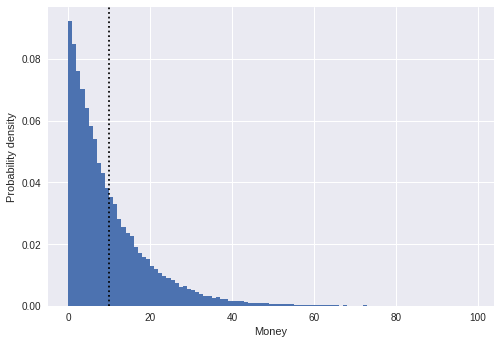

In [24]:
people = np.ones(P)*10

T = 100 # number of traids

for x in range(T):
    for y in range(P-1):
        epsilon = np.random.rand()
        m_tot = people[y] + people[y+1]
        people[y] = epsilon * m_tot
        people[y+1] = (1-epsilon) * m_tot
        
print("richest Person: ", np.amax(people))
print("poorest Person: ", np.amin(people))
print("mean of People", people.mean())

print("The richtest Person has now %.2f CHF and %d People won money." %(np.amax(people), people[people>10].size))
print("On the other hand the poorest Person has now %.2f CHF and %d People lost money" %(np.amin(people), people[people<10].size))


plt.hist(people, bins=np.arange(100), density=True)
plt.axvline(people.mean(), color='black', linestyle='dotted')
plt.xlabel('Money')
plt.ylabel('Probability density');